<a href="https://colab.research.google.com/github/abhishek-dangol/TensorFlow1/blob/master/TensorFlow_CelToFahn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import numpy as np


**Set up training data**

In [0]:
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i, c in enumerate(celsius_q):
  print("{} degrees Celcius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celcius = -40.0 degrees Fahrenheit
-10.0 degrees Celcius = 14.0 degrees Fahrenheit
0.0 degrees Celcius = 32.0 degrees Fahrenheit
8.0 degrees Celcius = 46.0 degrees Fahrenheit
15.0 degrees Celcius = 59.0 degrees Fahrenheit
22.0 degrees Celcius = 72.0 degrees Fahrenheit
38.0 degrees Celcius = 100.0 degrees Fahrenheit


**Create the model**

We use the simplest possible model we can, a Dense network. Since the problem is straightforward, the network will require only a single layer with a single neuron.
We will call the layer lo and create it by instantiating tf.keras.layers.Dense with the following configuration:

1.   input_shape=[1]- specifies that the input to this layer is a single value
2.   units=1 - specifies the number of neurons in the layer



In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

**Assemble the layers into the model**

Once layers are defined, they need to be assembled into  amodel. This model has just a single layer, lo

In [0]:
model = tf.keras.Sequential([l0])


**Compile the model, with loss and optimizer fucntions**



*   Loss function: A way of measuring how far off predictions are from the desired outcome
*   Optimizer function: A way of adjusting internal values in order to reduce the loss



In [0]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

**Train the model**

Train the model by calling the fit mehtod. The difference between the actual output and the desired output is calculated using the loss function and the optimizer function directs how the weights should be adjusted. The epochs argument specifies how many times this cycle should be run and the verbose argument controls how much output the method produces.

In [0]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


**Display the training statistics**

A high loss means that the Fahrenheit degrees model prediction is far from the corresponding value in fahrenheit_a

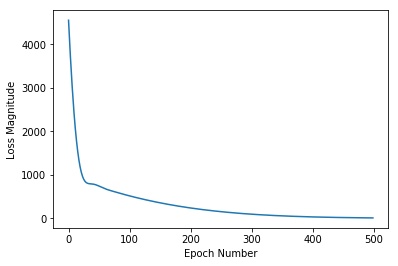

In [0]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

**Use the model to predict values**

The actual value of 100 degrees in celsius is 212 degrees in Fahrenheit

In [0]:
print(model.predict([100.0]))

[[211.30676]]
